In [14]:
# Setup

import os
import tensorflow as tf
import numpy as np
import logging
import matplotlib.pylab as plt

logging.getLogger('tensorflow').setLevel(logging.ERROR)
os.environ["KMP_AFFINITY"] = "noverbose"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel(logging.ERROR)
tf.autograph.set_verbosity(1)

np.set_printoptions(suppress=True)

In [2]:

# DATA
import data.training.x0_y0_z0 as n

import data.training.x30_y0_z0 as x30 # 30, 0, 0
import data.training.x45_y0_z0 as x45 # 45, 0, 0
import data.training.x50_y0_z0 as x50 # 50, 0, 0
import data.training.x60_y0_z0 as x60 # 60, 0, 0


    
corner_points = np.empty((0,8), float)
answers = np.empty((0,3), float)

#0,0,0
corner_points =  np.append(corner_points, n.corner_points, axis=0) # append data
rows, colms = n.corner_points.shape # append answers
for x in range(0,rows):
    answers = np.vstack([answers, [0,0,0]])
    
#30,0,0
corner_points =  np.append(corner_points, x30.corner_points, axis=0) 
rows, colms = x30.corner_points.shape
for x in range(0,rows):
    answers = np.vstack([answers, [30,0,0]])

#45,0,0
corner_points =  np.append(corner_points, x45.corner_points, axis=0) 
rows, colms = x45.corner_points.shape
for x in range(0,rows):
    answers = np.vstack([answers, [45,0,0]])   
   
#50,0,0
corner_points =  np.append(corner_points, x50.corner_points, axis=0) 
rows, colms = x50.corner_points.shape
for x in range(0,rows):
    answers = np.vstack([answers, [50,0,0]])   
   
#60,0,0
corner_points =  np.append(corner_points, x60.corner_points, axis=0) 
rows, colms = x60.corner_points.shape
for x in range(0,rows):
    answers = np.vstack([answers, [60,0,0]])


print(corner_points.shape)
print(answers.shape)

(1876, 8)
(1876, 3)


Epoch 1/500
59/59 [==============================] - 1s 2ms/step - loss: 295.4714
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 88.5676
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 80.1731
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 75.9088
Epoch 5/500
59/59 [==============================] - 0s 3ms/step - loss: 69.7991
Epoch 6/500
59/59 [==============================] - 0s 3ms/step - loss: 65.9637
Epoch 7/500
59/59 [==============================] - 0s 3ms/step - loss: 62.8011
Epoch 8/500
59/59 [==============================] - 0s 3ms/step - loss: 57.7441
Epoch 9/500
59/59 [==============================] - 0s 2ms/step - loss: 54.4806
Epoch 10/500
59/59 [==============================] - 0s 2ms/step - loss: 51.2360
Epoch 11/500
59/59 [==============================] - 0s 3ms/step - loss: 50.2424
Epoch 12/500
59/59 [==============================] - 0s 2ms/step - loss: 47.8699
Epoch 13/500
59/59 [====

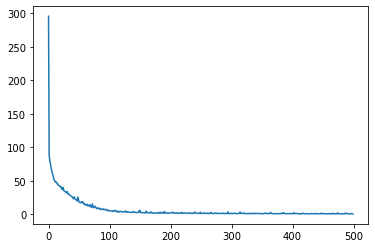

In [3]:
# Model Setup
# import training_data as data


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Normalization(axis=None),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
    tf.keras.layers.Dense(units=3,)
                             ])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.0002))



history = model.fit(corner_points, answers, epochs=500, verbose=1)

print("Finished training the model")
# plt.xlabel('Epoch Number')
# plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
print(history.history['loss'][-1])
# print(model.predict([0, 0, 1,1,2,2,3,3]))

In [12]:
import data.testing.x0_y0_z0 as tn
import data.testing.x30_y0_z0 as tx30
import data.testing.x45_y0_z0 as tx45
import data.testing.x50_y0_z0 as tx50
import data.testing.x60_y0_z0 as tx60

test_cp = np.empty((0,8), float)
test_ans = np.empty((0,3), float)

#0,0,0
test_cp =  np.append(test_cp, tn.corner_points, axis=0) # append data
rows, colms = tn.corner_points.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [0,0,0]])
    
#30,0,0
test_cp =  np.append(test_cp, tx30.corner_points, axis=0) # append data
rows, colms = tx30.corner_points.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [30,0,0]])
    
#45,0,0
test_cp =  np.append(test_cp, tx45.corner_points, axis=0) # append data
rows, colms = tx45.corner_points.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [45,0,0]])
    
#50,0,0
test_cp =  np.append(test_cp, tx50.corner_points, axis=0) # append data
rows, colms = tx50.corner_points.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [50,0,0]])

#60,0,0
test_cp =  np.append(test_cp, tx60.corner_points, axis=0) # append data
rows, colms = tx60.corner_points.shape # append answers
for x in range(0,rows):
    test_ans = np.vstack([test_ans, [60,0,0]])

print(test_cp.shape)
print(test_ans.shape)



(775, 8)
(775, 3)


In [16]:
#Testing
errorX = []
errorY = []
errorZ = []
errorMX = 0
errorMY = 0
errorMZ = 0

rows, colms = test_cp.shape
print('Number of tests: ', rows )

y = 0
for x in test_cp:
  p = model.predict(x)
  prediction = round(p[0][0], 2), round(p[0][1], 2), round(p[0][2], 2)
  answer = test_ans[y][0], test_ans[y][1], test_ans[y][2]
  eX = answer[0] - prediction[0]
  eY = answer[1] - prediction[1]
  eZ = answer[2] - prediction[2]
  errorX.append(eX)
  errorY.append(eY)
  errorZ.append(eZ) 
  if(errorMX < abs(eX)):
    errorMX = eX
  if(errorMY < abs(eY)):
    errorMY = eY
  if(errorMZ < abs(eZ)):
    errorMZ = eZ

  print('%',((y/rows)*100))
  y = y + 1



print('Number of tests: ', rows )
print('Max error X', errorMX, '   average error X: ', (sum(errorX)/len(errorX)))
print('Max error Y', errorMY, '   average error Y: ', (sum(errorY)/len(errorY)))
print('Max error Z', errorMZ, '   average error Z: ', (sum(errorZ)/len(errorZ)))


Number of tests:  775
1/1 [==============================] - 0s 37ms/step
% 0.0
1/1 [==============================] - 0s 22ms/step
% 0.12903225806451613
1/1 [==============================] - 0s 35ms/step
% 0.25806451612903225
1/1 [==============================] - 0s 16ms/step
% 0.3870967741935484
1/1 [==============================] - 0s 27ms/step
% 0.5161290322580645
1/1 [==============================] - 0s 22ms/step
% 0.6451612903225806
1/1 [==============================] - 0s 23ms/step
% 0.7741935483870968
1/1 [==============================] - 0s 20ms/step
% 0.903225806451613
1/1 [==============================] - 0s 19ms/step
% 1.032258064516129
1/1 [==============================] - 0s 20ms/step
% 1.1612903225806452
1/1 [==============================] - 0s 20ms/step
% 1.2903225806451613
1/1 [==============================] - 0s 18ms/step
% 1.4193548387096775
1/1 [==============================] - 0s 29ms/step
% 1.5483870967741935
1/1 [==============================] - 0s 28